# **Name : Muhammad Shakeel**
# **ID : 21924162**
# **Winning prediction of IPL 2023**

Data can be found at <a href="https://github.com/Muhammad-Shakeel-25/IPL-Prediction-AI">https://github.com/Muhammad-Shakeel-25/IPL-Prediction-AI</a>

# **IPL 2023 Winning Prediction 🏆 and Full Data Analysis**

*This project is only for educational purposes; please do not use it for gambling or fantasy leagues.*

<img src = 'https://www.insidesport.in/wp-content/uploads/2022/01/eng-banner-2.jpg'>



## **Contents in this Project**

1. Data Loading and Checking the Summary
2. Cleaning of Data
3. Extraction of Characteristics
4. Data Visualisation and EDA
5. Best Player Clusters Based on Performance Since 2008
6. IPL Match Prediction: Who Will Win?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
matches123 = pd.read_csv('IPL_Matches_2008_2022.csv')
balls123 = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
matches123.head(16)

ID         City        Date Season  MatchNumber  \
0   1312200    Ahmedabad  2022-05-29   2022        Final   
1   1312199    Ahmedabad  2022-05-27   2022  Qualifier 2   
2   1312198      Kolkata  2022-05-25   2022   Eliminator   
3   1312197      Kolkata  2022-05-24   2022  Qualifier 1   
4   1304116       Mumbai  2022-05-22   2022           70   
5   1304115       Mumbai  2022-05-21   2022           69   
6   1304114       Mumbai  2022-05-20   2022           68   
7   1304113       Mumbai  2022-05-19   2022           67   
8   1304112  Navi Mumbai  2022-05-18   2022           66   
9   1304111       Mumbai  2022-05-17   2022           65   
10  1304110  Navi Mumbai  2022-05-16   2022           64   
11  1304109       Mumbai  2022-05-15   2022           63   
12  1304108       Mumbai  2022-05-15   2022           62   
13  1304107         Pune  2022-05-14   2022           61   
14  1304106       Mumbai  2022-05-13   2022           60   
15  1304105       Mumbai  2022-05-12   2022           59   

                          Team1                        Team2  \
0              Rajasthan Royals               Gujarat Titans   
1   Royal Challengers Bangalore             Rajasthan Royals   
2   Royal Challengers Bangalore         Lucknow Super Giants   
3              Rajasthan Royals               Gujarat Titans   
4           Sunrisers Hyderabad                 Punjab Kings   
5                Delhi Capitals               Mumbai Indians   
6           Chennai Super Kings             Rajasthan Royals   
7                Gujarat Titans  Royal Challengers Bangalore   
8          Lucknow Super Giants        Kolkata Knight Riders   
9           Sunrisers Hyderabad               Mumbai Indians   
10               Delhi Capitals                 Punjab Kings   
11             Rajasthan Royals         Lucknow Super Giants   
12          Chennai Super Kings               Gujarat Titans   
13        Kolkata Knight Riders          Sunrisers Hyderabad   
14                 Punjab Kings  Royal Challengers Bangalore   
15          Chennai Super Kings               Mumbai Indians   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   
15                       Wankhede Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   
15               Mumbai Indians        field         N   

          

In [3]:
print(matches123.shape)
print(" -------------------- ")
print(matches123.isnull().sum())
print(" -------------------- ")
print(matches123.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [4]:
matches123[matches123['WinningTeam'].isna()]

ID       City        Date Season MatchNumber  \
205  1178424  Bengaluru  2019-04-30   2019          49   
437   829813  Bangalore  2015-05-17   2015          55   
464   829763  Bangalore  2015-04-29   2015          29   
708   501265      Delhi  2011-05-21   2011          68   

                           Team1             Team2                  Venue  \
205  Royal Challengers Bangalore  Rajasthan Royals  M.Chinnaswamy Stadium   
437  Royal Challengers Bangalore  Delhi Daredevils  M Chinnaswamy Stadium   
464  Royal Challengers Bangalore  Rajasthan Royals  M Chinnaswamy Stadium   
708             Delhi Daredevils     Pune Warriors       Feroz Shah Kotla   

                      TossWinner TossDecision SuperOver WinningTeam  \
205             Rajasthan Royals        field       NaN         NaN   
437  Royal Challengers Bangalore        field       NaN         NaN   
464             Rajasthan Royals        field       NaN         NaN   
708             Delhi Daredevils          bat       NaN         NaN   

         WonBy  Margin method Player_of_Match  \
205  NoResults     NaN    NaN             NaN   
437  NoResults     NaN    NaN             NaN   
464  NoResults     NaN    NaN             NaN   
708  NoResults     NaN    NaN             NaN   

                                          Team1Players  \
205  ['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...   
437  ['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...   
464  ['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...   
708  ['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...   

                                          Team2Players          Umpire1  \
205  ['SV Samson', 'LS Livingstone', 'AM Rahane', '...         NJ Llong   
437  ['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...  HDPK Dharmasena   
464  ['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...        JD Cloete   
708  ['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...        SS Hazare   

          Umpire2  
205     UV Gandhe  
437  K Srinivasan  
464     PG Pathak  
708     RJ Tucker

### These matches had no results since they were halted due to rain or other factors, thus they should be removed from the record.

In [5]:
# First Drop the Unwanted Columns
matches123.drop(['City','ID','method'],axis=1,inplace=True)
matches123 = matches123.dropna()

In [6]:
matches123.head(15)

Date Season  MatchNumber                        Team1  \
0   2022-05-29   2022        Final             Rajasthan Royals   
1   2022-05-27   2022  Qualifier 2  Royal Challengers Bangalore   
2   2022-05-25   2022   Eliminator  Royal Challengers Bangalore   
3   2022-05-24   2022  Qualifier 1             Rajasthan Royals   
4   2022-05-22   2022           70          Sunrisers Hyderabad   
5   2022-05-21   2022           69               Delhi Capitals   
6   2022-05-20   2022           68          Chennai Super Kings   
7   2022-05-19   2022           67               Gujarat Titans   
8   2022-05-18   2022           66         Lucknow Super Giants   
9   2022-05-17   2022           65          Sunrisers Hyderabad   
10  2022-05-16   2022           64               Delhi Capitals   
11  2022-05-15   2022           63             Rajasthan Royals   
12  2022-05-15   2022           62          Chennai Super Kings   
13  2022-05-14   2022           61        Kolkata Knight Riders   
14  2022-05-13   2022           60                 Punjab Kings   

                          Team2  \
0                Gujarat Titans   
1              Rajasthan Royals   
2          Lucknow Super Giants   
3                Gujarat Titans   
4                  Punjab Kings   
5                Mumbai Indians   
6              Rajasthan Royals   
7   Royal Challengers Bangalore   
8         Kolkata Knight Riders   
9                Mumbai Indians   
10                 Punjab Kings   
11         Lucknow Super Giants   
12               Gujarat Titans   
13          Sunrisers Hyderabad   
14  Royal Challengers Bangalore   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   

                    WinningTeam    WonBy  Margin Player_of_Match  \
0                Gujarat Titans  Wickets     7.0       HH Pandya   
1              Rajasthan Royals  Wickets     7.0      JC Buttler   
2   Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3                Gujarat Titans  Wickets     7.0       DA Miller   
4                  Punjab Kings  Wickets     5.0   Harpreet Brar   
5                Mumbai Indians  Wickets     5.0       JJ Bumrah   
6              Rajasthan Royals  Wickets     5.0        R Ashwin   
7   Royal Challengers Bangalore  Wickets     8.0      

In [7]:
matches123[matches123['Season']=='2020/21'].head(2)

Date   Season  MatchNumber           Team1                Team2  \
134  2020-11-10  2020/21        Final  Delhi Capitals       Mumbai Indians   
135  2020-11-08  2020/21  Qualifier 2  Delhi Capitals  Sunrisers Hyderabad   

                                   Venue      TossWinner TossDecision  \
134  Dubai International Cricket Stadium  Delhi Capitals          bat   
135                 Sheikh Zayed Stadium  Delhi Capitals          bat   

    SuperOver     WinningTeam    WonBy  Margin Player_of_Match  \
134         N  Mumbai Indians  Wickets     5.0        TA Boult   
135         N  Delhi Capitals     Runs    17.0      MP Stoinis   

                                          Team1Players  \
134  ['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...   
135  ['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...   

                                          Team2Players      Umpire1  \
134  ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...  CB Gaffaney   
135  ['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...   PR Reiffel   

         Umpire2  
134  Nitin Menon  
135       S Ravi

In [8]:
# Convert the Date columns into their respective data types
matches123['Date'] = pd.to_datetime(matches123['Date'])

In [9]:
matches123['SEASON_INT'] = matches123['Season'].apply(lambda x: int(x[:4]))
matches123['SEASON_END_INT'] = matches123['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [10]:
matches123.drop('Season',axis=1, inplace=True)

In [11]:
matches123.head(15)

Date  MatchNumber                        Team1  \
0  2022-05-29        Final             Rajasthan Royals   
1  2022-05-27  Qualifier 2  Royal Challengers Bangalore   
2  2022-05-25   Eliminator  Royal Challengers Bangalore   
3  2022-05-24  Qualifier 1             Rajasthan Royals   
4  2022-05-22           70          Sunrisers Hyderabad   
5  2022-05-21           69               Delhi Capitals   
6  2022-05-20           68          Chennai Super Kings   
7  2022-05-19           67               Gujarat Titans   
8  2022-05-18           66         Lucknow Super Giants   
9  2022-05-17           65          Sunrisers Hyderabad   
10 2022-05-16           64               Delhi Capitals   
11 2022-05-15           63             Rajasthan Royals   
12 2022-05-15           62          Chennai Super Kings   
13 2022-05-14           61        Kolkata Knight Riders   
14 2022-05-13           60                 Punjab Kings   

                          Team2  \
0                Gujarat Titans   
1              Rajasthan Royals   
2          Lucknow Super Giants   
3                Gujarat Titans   
4                  Punjab Kings   
5                Mumbai Indians   
6              Rajasthan Royals   
7   Royal Challengers Bangalore   
8         Kolkata Knight Riders   
9                Mumbai Indians   
10                 Punjab Kings   
11         Lucknow Super Giants   
12               Gujarat Titans   
13          Sunrisers Hyderabad   
14  Royal Challengers Bangalore   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   

                    WinningTeam    WonBy  Margin Player_of_Match  \
0                Gujarat Titans  Wickets     7.0       HH Pandya   
1              Rajasthan Royals  Wickets     7.0      JC Buttler   
2   Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3                Gujarat Titans  Wickets     7.0       DA Miller   
4                  Punjab Kings  Wickets     5.0   Harpreet Brar   
5                Mumbai Indians  Wickets     5.0       JJ Bumrah   
6              Rajasthan Royals  Wickets     5.0        R Ashwin   
7   Royal Challengers Bangalore  Wickets     8.0         V Kohli   
8          Lucknow Super Giants     Runs     2.0       Q de Kock   
9           Sunrisers Hyderabad     Runs     

In [12]:
matches123['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [13]:
matches123['Team1'] = matches123['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches123['Team2'] = matches123['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches123['Team1'] = matches123['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches123['Team2'] = matches123['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches123['Team1'] = matches123['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches123['Team2'] = matches123['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches123['Team1'] = matches123['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches123['Team2'] = matches123['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches123['Team1'] = matches123['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches123['Team2'] = matches123['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches123['Team1'] = matches123['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches123['Team2'] = matches123['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches123['WinningTeam'] = matches123['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [14]:
matches123.head(16)

Date  MatchNumber                        Team1  \
0  2022-05-29        Final             Rajasthan Royals   
1  2022-05-27  Qualifier 2  Royal Challengers Bangalore   
2  2022-05-25   Eliminator  Royal Challengers Bangalore   
3  2022-05-24  Qualifier 1             Rajasthan Royals   
4  2022-05-22           70          Sunrisers Hyderabad   
5  2022-05-21           69               Delhi Capitals   
6  2022-05-20           68          Chennai Super Kings   
7  2022-05-19           67               Gujarat Titans   
8  2022-05-18           66         Lucknow Super Giants   
9  2022-05-17           65          Sunrisers Hyderabad   
10 2022-05-16           64               Delhi Capitals   
11 2022-05-15           63             Rajasthan Royals   
12 2022-05-15           62          Chennai Super Kings   
13 2022-05-14           61        Kolkata Knight Riders   
14 2022-05-13           60                 Punjab Kings   
15 2022-05-12           59          Chennai Super Kings   

                          Team2  \
0                Gujarat Titans   
1              Rajasthan Royals   
2          Lucknow Super Giants   
3                Gujarat Titans   
4                  Punjab Kings   
5                Mumbai Indians   
6              Rajasthan Royals   
7   Royal Challengers Bangalore   
8         Kolkata Knight Riders   
9                Mumbai Indians   
10                 Punjab Kings   
11         Lucknow Super Giants   
12               Gujarat Titans   
13          Sunrisers Hyderabad   
14  Royal Challengers Bangalore   
15               Mumbai Indians   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   
15                       Wankhede Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   
15               Mumbai Indians        field         N   

                    WinningTeam    WonBy  Margin Player_of_Match  \
0                Gujarat Titans  Wickets     7.0       HH Pandya   
1              Rajasthan Royals  Wickets     7.0      JC Buttler   
2   Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3                Gujarat Titans  Wickets     7.0       DA Miller   
4                  Punjab Kings  Wickets     5.0   Harpreet Brar   
5                Mumbai Indians  Wickets     5.0       JJ Bumrah   
6              Rajasthan Royals  Wickets    

### Okey! Now that we've cleaned up the Match Dataframe, let's look at the Ball by Ball Dataframe and create a Statistical Dataframe out of it so we can build a Dashboard or do Visualisation.

In [15]:
balls123.head(16)

ID  innings  overs  ballnumber       batter          bowler  \
0   1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1   1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2   1312200        1      0           3   JC Buttler  Mohammed Shami   
3   1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4   1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
5   1312200        1      0           6  YBK Jaiswal  Mohammed Shami   
6   1312200        1      1           1   JC Buttler      Yash Dayal   
7   1312200        1      1           2   JC Buttler      Yash Dayal   
8   1312200        1      1           3   JC Buttler      Yash Dayal   
9   1312200        1      1           4   JC Buttler      Yash Dayal   
10  1312200        1      1           5   JC Buttler      Yash Dayal   
11  1312200        1      1           6  YBK Jaiswal      Yash Dayal   
12  1312200        1      2           1   JC Buttler  Mohammed Shami   
13  1312200        1      2           2  YBK Jaiswal  Mohammed Shami   
14  1312200        1      2           3  YBK Jaiswal  Mohammed Shami   
15  1312200        1      2           4  YBK Jaiswal  Mohammed Shami   

    non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0    JC Buttler        NaN            0           0          0             0   
1    JC Buttler    legbyes            0           1          1             0   
2   YBK Jaiswal        NaN            1           0          1             0   
3    JC Buttler        NaN            0           0          0             0   
4    JC Buttler        NaN            0           0          0             0   
5    JC Buttler        NaN            0           0          0             0   
6   YBK Jaiswal        NaN            0           0          0             0   
7   YBK Jaiswal        NaN            0           0          0             0   
8   YBK Jaiswal        NaN            4           0          4             0   
9   YBK Jaiswal        NaN            0           0          0             0   
10  YBK Jaiswal        NaN            1           0          1             0   
11   JC Buttler        NaN            0           0          0             0   
12  YBK Jaiswal        NaN            1           0          1             0   
13   JC Buttler        NaN            0           0          0             0   
14   JC Buttler        NaN            4           0          4             0   
15   JC Buttler        NaN            0           0          0             0   

    isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                  0        NaN  NaN               NaN  Rajasthan Royals  
1                  0        NaN  NaN               NaN  Rajasthan Royals  
2                  0        NaN  NaN               NaN  Rajasthan Royals  
3                  0        NaN  NaN               NaN  Rajasthan Royals  
4                  0        NaN  NaN               NaN  Rajasthan Royals  
5                  0        NaN  NaN               NaN  Rajasthan Royals  
6                  0        NaN  NaN               NaN  Rajasthan Royals  
7                  0        NaN  NaN               NaN  Rajasthan Royals  
8                  0        NaN  NaN               NaN  Rajasthan Royals  
9                  0        NaN  NaN               NaN  Rajasthan Royals  
10                 0        NaN  NaN               NaN  Rajasthan Royals  
11                 0        NaN  NaN               NaN  Rajasthan Royals  
12                 0        NaN  NaN               NaN  Rajasthan Royals  
13                 0        NaN  NaN               NaN  Rajasthan Royals  
14                 0        NaN  NaN               NaN  Rajasthan Royals  
15                 0        NaN  NaN               NaN  Rajasthan Royals

In [16]:
print(balls123.shape)
print(" -------------------- ")
print(balls123.isnull().sum())
print(" -------------------- ")
print(balls123.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [17]:
batgroup = balls123.groupby(['batter'])
batsman_Stats123 = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats123.head(16)

Balls_Faced
batter                     
A Ashish Reddy          196
A Badoni                139
A Chandila                7
A Chopra                 75
A Choudhary              20
A Dananjaya               5
A Flintoff               57
A Kumble                 49
A Manohar                79
A Mishra                410
A Mithun                 26
A Mukund                 23
A Nehra                  63
A Nortje                 13
A Singh                  10
A Symonds               781

In [20]:
batsman_Stats123['innings']=batgroup['innings'].nunique()
batsman_Stats123.head(16)

Balls_Faced  innings
batter                              
A Ashish Reddy          196        2
A Badoni                139        2
A Chandila                7        1
A Chopra                 75        2
A Choudhary              20        2
A Dananjaya               5        1
A Flintoff               57        2
A Kumble                 49        2
A Manohar                79        2
A Mishra                410        2
A Mithun                 26        2
A Mukund                 23        2
A Nehra                  63        2
A Nortje                 13        2
A Singh                  10        2
A Symonds               781        2

In [22]:
batsman_Stats123['runs']=batgroup['batsman_run'].sum()
batsman_Stats123.head(16)

Balls_Faced  innings  runs
batter                                    
A Ashish Reddy          196        2   280
A Badoni                139        2   161
A Chandila                7        1     4
A Chopra                 75        2    53
A Choudhary              20        2    25
A Dananjaya               5        1     4
A Flintoff               57        2    62
A Kumble                 49        2    35
A Manohar                79        2   108
A Mishra                410        2   362
A Mithun                 26        2    34
A Mukund                 23        2    19
A Nehra                  63        2    41
A Nortje                 13        2     8
A Singh                  10        2     2
A Symonds               781        2   974

In [24]:
batsman_Stats123['0s'] = balls123[balls123['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats123['0s'].fillna(0,inplace=True)
batsman_Stats123.head(16)

Balls_Faced  innings  runs     0s
batter                                           
A Ashish Reddy          196        2   280   61.0
A Badoni                139        2   161   57.0
A Chandila                7        1     4    3.0
A Chopra                 75        2    53   45.0
A Choudhary              20        2    25    4.0
A Dananjaya               5        1     4    2.0
A Flintoff               57        2    62   24.0
A Kumble                 49        2    35   24.0
A Manohar                79        2   108   30.0
A Mishra                410        2   362  182.0
A Mithun                 26        2    34   11.0
A Mukund                 23        2    19    9.0
A Nehra                  63        2    41   37.0
A Nortje                 13        2     8    9.0
A Singh                  10        2     2    8.0
A Symonds               781        2   974  308.0

In [26]:
batsman_Stats123['1s'] = balls123[balls123['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats123['1s'].fillna(0,inplace=True)

batsman_Stats123['2s'] = balls123[balls123['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats123['2s'].fillna(0,inplace=True)

batsman_Stats123['3s'] = balls123[balls123['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats123['3s'].fillna(0,inplace=True)

batsman_Stats123['4s'] = balls123[balls123['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats123['4s'].fillna(0,inplace=True)

batsman_Stats123['6s'] = balls123[balls123['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats123['6s'].fillna(0,inplace=True)

batsman_Stats123.head(16)

Balls_Faced  innings  runs     0s     1s    2s   3s    4s  \
batter                                                                      
A Ashish Reddy          196        2   280   61.0   83.0  20.0  1.0  16.0   
A Badoni                139        2   161   57.0   53.0  11.0  0.0  11.0   
A Chandila                7        1     4    3.0    4.0   0.0  0.0   0.0   
A Chopra                 75        2    53   45.0   21.0   2.0  0.0   7.0   
A Choudhary              20        2    25    4.0   13.0   1.0  0.0   1.0   
A Dananjaya               5        1     4    2.0    2.0   1.0  0.0   0.0   
A Flintoff               57        2    62   24.0   23.0   2.0  1.0   5.0   
A Kumble                 49        2    35   24.0   21.0   1.0  0.0   3.0   
A Manohar                79        2   108   30.0   30.0   2.0  0.0  14.0   
A Mishra                410        2   362  182.0  172.0  22.0  0.0  29.0   
A Mithun                 26        2    34   11.0    8.0   2.0  0.0   4.0   
A Mukund                 23        2    19    9.0   11.0   2.0  0.0   1.0   
A Nehra                  63        2    41   37.0   21.0   1.0  0.0   3.0   
A Nortje                 13        2     8    9.0    2.0   0.0  2.0   0.0   
A Singh                  10        2     2    8.0    2.0   0.0  0.0   0.0   
A Symonds               781        2   974  308.0  288.0  66.0  4.0  74.0   

                  6s  
batter                
A Ashish Reddy  15.0  
A Badoni         7.0  
A Chandila       0.0  
A Chopra         0.0  
A Choudhary      1.0  
A Dananjaya      0.0  
A Flintoff       2.0  
A Kumble         0.0  
A Manohar        3.0  
A Mishra         5.0  
A Mithun         1.0  
A Mukund         0.0  
A Nehra          1.0  
A Nortje         0.0  
A Singh          0.0  
A Symonds       41.0

In [27]:
batsman_Stats123['player_out']=batgroup['player_out'].count()
batsman_Stats123.head(16)

Balls_Faced  innings  runs     0s     1s    2s   3s    4s  \
batter                                                                      
A Ashish Reddy          196        2   280   61.0   83.0  20.0  1.0  16.0   
A Badoni                139        2   161   57.0   53.0  11.0  0.0  11.0   
A Chandila                7        1     4    3.0    4.0   0.0  0.0   0.0   
A Chopra                 75        2    53   45.0   21.0   2.0  0.0   7.0   
A Choudhary              20        2    25    4.0   13.0   1.0  0.0   1.0   
A Dananjaya               5        1     4    2.0    2.0   1.0  0.0   0.0   
A Flintoff               57        2    62   24.0   23.0   2.0  1.0   5.0   
A Kumble                 49        2    35   24.0   21.0   1.0  0.0   3.0   
A Manohar                79        2   108   30.0   30.0   2.0  0.0  14.0   
A Mishra                410        2   362  182.0  172.0  22.0  0.0  29.0   
A Mithun                 26        2    34   11.0    8.0   2.0  0.0   4.0   
A Mukund                 23        2    19    9.0   11.0   2.0  0.0   1.0   
A Nehra                  63        2    41   37.0   21.0   1.0  0.0   3.0   
A Nortje                 13        2     8    9.0    2.0   0.0  2.0   0.0   
A Singh                  10        2     2    8.0    2.0   0.0  0.0   0.0   
A Symonds               781        2   974  308.0  288.0  66.0  4.0  74.0   

                  6s  player_out  
batter                            
A Ashish Reddy  15.0          15  
A Badoni         7.0           9  
A Chandila       0.0           1  
A Chopra         0.0           5  
A Choudhary      1.0           2  
A Dananjaya      0.0           0  
A Flintoff       2.0           2  
A Kumble         0.0           2  
A Manohar        3.0           6  
A Mishra         5.0          30  
A Mithun         1.0           5  
A Mukund         0.0           2  
A Nehra          1.0           8  
A Nortje         0.0           1  
A Singh          0.0           4  
A Symonds       41.0          26

In [28]:
batsman_Stats123['bat_average'] = round(batsman_Stats123['runs']/batsman_Stats123['player_out'],2)
batsman_Stats123['bat_average'].fillna(0,inplace=True)
batsman_Stats123['bat_strike'] = round(batsman_Stats123['runs']/batsman_Stats123['Balls_Faced']*100,2)
batsman_Stats123['bat_strike'].fillna(0,inplace=True)
batsman_Stats123.head(16)

Balls_Faced  innings  runs     0s     1s    2s   3s    4s  \
batter                                                                      
A Ashish Reddy          196        2   280   61.0   83.0  20.0  1.0  16.0   
A Badoni                139        2   161   57.0   53.0  11.0  0.0  11.0   
A Chandila                7        1     4    3.0    4.0   0.0  0.0   0.0   
A Chopra                 75        2    53   45.0   21.0   2.0  0.0   7.0   
A Choudhary              20        2    25    4.0   13.0   1.0  0.0   1.0   
A Dananjaya               5        1     4    2.0    2.0   1.0  0.0   0.0   
A Flintoff               57        2    62   24.0   23.0   2.0  1.0   5.0   
A Kumble                 49        2    35   24.0   21.0   1.0  0.0   3.0   
A Manohar                79        2   108   30.0   30.0   2.0  0.0  14.0   
A Mishra                410        2   362  182.0  172.0  22.0  0.0  29.0   
A Mithun                 26        2    34   11.0    8.0   2.0  0.0   4.0   
A Mukund                 23        2    19    9.0   11.0   2.0  0.0   1.0   
A Nehra                  63        2    41   37.0   21.0   1.0  0.0   3.0   
A Nortje                 13        2     8    9.0    2.0   0.0  2.0   0.0   
A Singh                  10        2     2    8.0    2.0   0.0  0.0   0.0   
A Symonds               781        2   974  308.0  288.0  66.0  4.0  74.0   

                  6s  player_out  bat_average  bat_strike  
batter                                                     
A Ashish Reddy  15.0          15        18.67      142.86  
A Badoni         7.0           9        17.89      115.83  
A Chandila       0.0           1         4.00       57.14  
A Chopra         0.0           5        10.60       70.67  
A Choudhary      1.0           2        12.50      125.00  
A Dananjaya      0.0           0          inf       80.00  
A Flintoff       2.0           2        31.00      108.77  
A Kumble         0.0           2        17.50       71.43  
A Manohar        3.0           6        18.00      136.71  
A Mishra         5.0          30        12.07       88.29  
A Mithun         1.0           5         6.80      130.77  
A Mukund         0.0           2         9.50       82.61  
A Nehra          1.0           8         5.12       65.08  
A Nortje         0.0           1         8.00       61.54  
A Singh          0.0           4         0.50       20.00  
A Symonds       41.0          26        37.46      124.71

### So, now that we have Batsman Statistics, let us construct Bowler Statistics.

In [29]:
bowlgroup = balls123.groupby(['bowler'])

In [30]:
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [31]:
balls123['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [32]:
# Get only useful Wicket and Outs
wickets_out = balls123[balls123['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head(16)

BallsThrow  wickets
bowler                             
A Ashish Reddy         270     18.0
A Badoni                12      2.0
A Chandila             234     11.0
A Choudhary            108      5.0
A Dananjaya             25      NaN
A Flintoff              66      2.0
A Kumble               983     45.0
A Mishra              3317    166.0
A Mithun               312      7.0
A Nehra               1974    106.0
A Nel                   18      1.0
A Nortje               706     43.0
A Singh                486     28.0
A Symonds              540     20.0
A Uniyal                38      2.0
A Zampa                292     21.0

In [33]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [34]:
 # Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head(16)

BallsThrow  wickets  overs
bowler                                    
A Ashish Reddy         270     18.0   45.0
A Badoni                12      2.0    2.0
A Chandila             234     11.0   39.0
A Choudhary            108      5.0   18.0
A Dananjaya             25      0.0    4.0
A Flintoff              66      2.0   11.0
A Kumble               983     45.0  164.0
A Mishra              3317    166.0  553.0
A Mithun               312      7.0   52.0
A Nehra               1974    106.0  329.0
A Nel                   18      1.0    3.0
A Nortje               706     43.0  118.0
A Singh                486     28.0   81.0
A Symonds              540     20.0   90.0
A Uniyal                38      2.0    6.0
A Zampa                292     21.0   49.0

In [35]:
bowler_Stats['runs_conceded'] = balls123.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head(16)

BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0            386
A Badoni                12      2.0    2.0             11
A Chandila             234     11.0   39.0            242
A Choudhary            108      5.0   18.0            137
A Dananjaya             25      0.0    4.0             46
A Flintoff              66      2.0   11.0            105
A Kumble               983     45.0  164.0           1027
A Mishra              3317    166.0  553.0           3897
A Mithun               312      7.0   52.0            448
A Nehra               1974    106.0  329.0           2422
A Nel                   18      1.0    3.0             31
A Nortje               706     43.0  118.0            884
A Singh                486     28.0   81.0            603
A Symonds              540     20.0   90.0            656
A Uniyal                38      2.0    6.0             64
A Zampa                292     21.0   49.0            361

In [36]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls123[balls123['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [37]:
bowler_Stats.head(16)

BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0          396.0
A Badoni                12      2.0    2.0           11.0
A Chandila             234     11.0   39.0          242.0
A Choudhary            108      5.0   18.0          144.0
A Dananjaya             25      0.0    4.0           47.0
A Flintoff              66      2.0   11.0          105.0
A Kumble               983     45.0  164.0         1058.0
A Mishra              3317    166.0  553.0         3976.0
A Mithun               312      7.0   52.0          472.0
A Nehra               1974    106.0  329.0         2495.0
A Nel                   18      1.0    3.0           31.0
A Nortje               706     43.0  118.0          916.0
A Singh                486     28.0   81.0          620.0
A Symonds              540     20.0   90.0          674.0
A Uniyal                38      2.0    6.0           66.0
A Zampa                292     21.0   49.0          370.0

In [38]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head(16)

BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                                 
A Ashish Reddy         270     18.0   45.0          396.0       8.80   
A Badoni                12      2.0    2.0           11.0       5.50   
A Chandila             234     11.0   39.0          242.0       6.21   
A Choudhary            108      5.0   18.0          144.0       8.00   
A Dananjaya             25      0.0    4.0           47.0      11.75   
A Flintoff              66      2.0   11.0          105.0       9.55   
A Kumble               983     45.0  164.0         1058.0       6.45   
A Mishra              3317    166.0  553.0         3976.0       7.19   
A Mithun               312      7.0   52.0          472.0       9.08   
A Nehra               1974    106.0  329.0         2495.0       7.58   
A Nel                   18      1.0    3.0           31.0      10.33   
A Nortje               706     43.0  118.0          916.0       7.76   
A Singh                486     28.0   81.0          620.0       7.65   
A Symonds              540     20.0   90.0          674.0       7.49   
A Uniyal                38      2.0    6.0           66.0      11.00   
A Zampa                292     21.0   49.0          370.0       7.55   

                bowl_strike_rate  
bowler                            
A Ashish Reddy             15.00  
A Badoni                    6.00  
A Chandila                 21.27  
A Choudhary                21.60  
A Dananjaya                  inf  
A Flintoff                 33.00  
A Kumble                   21.84  
A Mishra                   19.98  
A Mithun                   44.57  
A Nehra                    18.62  
A Nel                      18.00  
A Nortje                   16.42  
A Singh                    17.36  
A Symonds                  27.00  
A Uniyal                   19.00  
A Zampa                    13.90

In [39]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls123.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [40]:
final_players_matches.head(16)

matches
Players                   
YBK Jaiswal             23
JC Buttler              81
Mohammed Shami          93
Yash Dayal               9
SV Samson              134
LH Ferguson             35
Rashid Khan             92
HH Pandya              105
D Padikkal              46
SO Hetmyer              44
R Ashwin               181
R Parag                 40
R Sai Kishore            5
TA Boult                78
OC McCoy                 7
M Prasidh Krishna       51

In [41]:
# Catches Caught by Players
outbyCatch = balls123[(balls123['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls123[(balls123['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [42]:
catchDf.head(16)

catches
A Ashish Reddy      9.0
A Badoni            9.0
A Chandila          7.0
A Chopra            2.0
A Flintoff          4.0
A Kumble           10.0
A Manohar           4.0
A Mishra           21.0
A Mithun            7.0
A Mukund            3.0
A Nehra            19.0
A Nortje            7.0
A Singh             1.0
A Symonds          21.0
A Zampa             1.0
AA Bilakhia         1.0

### Now that we have Batsman and Bowler Statistics, let's join them using the join Function to create a full_fledged DataFrame with all of the players' information, and then we can extract the Clusters of Best Players from all of them.

In [46]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats123, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches123['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head(16)

matches  Balls_Faced  innings   runs     0s     1s    2s   3s  \
A Ashish Reddy     28.0        196.0      2.0  280.0   61.0   83.0  20.0  1.0   
A Badoni           11.0        139.0      2.0  161.0   57.0   53.0  11.0  0.0   
A Chandila         12.0          7.0      1.0    4.0    3.0    4.0   0.0  0.0   
A Chopra            6.0         75.0      2.0   53.0   45.0   21.0   2.0  0.0   
A Choudhary         5.0         20.0      2.0   25.0    4.0   13.0   1.0  0.0   
A Dananjaya         1.0          5.0      1.0    4.0    2.0    2.0   1.0  0.0   
A Flintoff          3.0         57.0      2.0   62.0   24.0   23.0   2.0  1.0   
A Kumble           42.0         49.0      2.0   35.0   24.0   21.0   1.0  0.0   
A Manohar           7.0         79.0      2.0  108.0   30.0   30.0   2.0  0.0   
A Mishra          154.0        410.0      2.0  362.0  182.0  172.0  22.0  0.0   
A Mithun           16.0         26.0      2.0   34.0   11.0    8.0   2.0  0.0   
A Mukund            2.0         23.0      2.0   19.0    9.0   11.0   2.0  0.0   
A Nehra            88.0         63.0      2.0   41.0   37.0   21.0   1.0  0.0   
A Nel               1.0          0.0      0.0    0.0    0.0    0.0   0.0  0.0   
A Nortje           30.0         13.0      2.0    8.0    9.0    2.0   0.0  2.0   
A Singh            23.0         10.0      2.0    2.0    8.0    2.0   0.0  0.0   

                  4s    6s  player_out  bat_average  bat_strike  BallsThrow  \
A Ashish Reddy  16.0  15.0        15.0        18.67      142.86       270.0   
A Badoni        11.0   7.0         9.0        17.89      115.83        12.0   
A Chandila       0.0   0.0         1.0         4.00       57.14       234.0   
A Chopra         7.0   0.0         5.0        10.60       70.67         0.0   
A Choudhary      1.0   1.0         2.0        12.50      125.00       108.0   
A Dananjaya      0.0   0.0         0.0          inf       80.00        25.0   
A Flintoff       5.0   2.0         2.0        31.00      108.77        66.0   
A Kumble         3.0   0.0         2.0        17.50       71.43       983.0   
A Manohar       14.0   3.0         6.0        18.00      136.71         0.0   
A Mishra        29.0   5.0        30.0        12.07       88.29      3317.0   
A Mithun         4.0   1.0         5.0         6.80      130.77       312.0   
A Mukund         1.0   0.0         2.0         9.50       82.61         0.0   
A Nehra          3.0   1.0         8.0         5.12       65.08      1974.0   
A Nel            0.0   0.0         0.0         0.00        0.00        18.0   
A Nortje         0.0   0.0         1.0         8.00       61.54       706.0   
A Singh          0.0   0.0         4.0         0.50       20.00       486.0   

                wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
A Ashish Reddy     18.0   45.0          396.0       8.80             15.00   
A Badoni            2.0    2.0           11.0       5.50              6.00   
A Chandila         11.0   39.0          242.0       6.21             21.27   
A Chopra            0.0    0.0            0.0       0.00              0.00   
A Choudhary         5.0   18.0          144.0       8.00             21.60   
A Dananjaya         0.0    4.0           47.0      11.75               inf   
A Flintoff          2.0   11.0          105.0       9.55             33.00   
A Kumble           45.0  164.0         1058.0       6.45             21.84   
A Manohar           0.0    0.0            0.0       0.00              0.00   
A Mishra          166.0  553.0         3976.0       7.19             19.98   
A Mithun            7.0   52.0          472.0       9.08             44.57   
A Mukund            0.0    0.0            0.0       0.00              0.00   
A Nehra           106.0  329.0         2495.0       7.58             18.62   
A Nel               1.0    3.0           31.0      10.33             18.00   
A Nortje           43.0  118.0          916.0       7.76             16.42   
A Singh            28.0   81.0          620.0 

## Great!! Now, let's conduct some data visualisation to show who has consistently performed well from 2008 through 2022.

In [47]:
import plotly.express as px

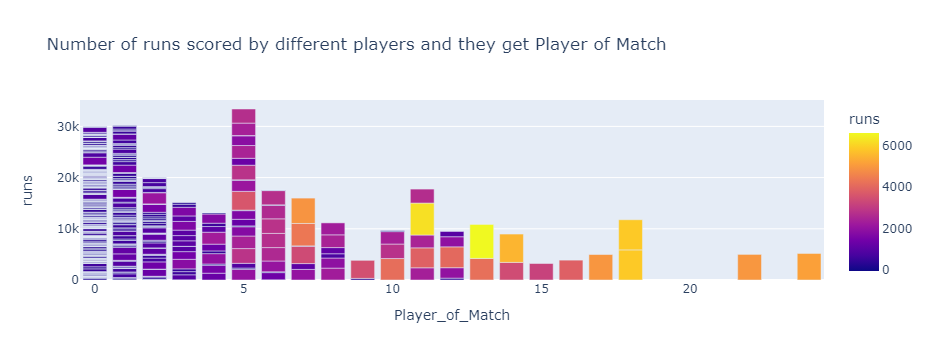

In [48]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
# show the plot
fig.show()

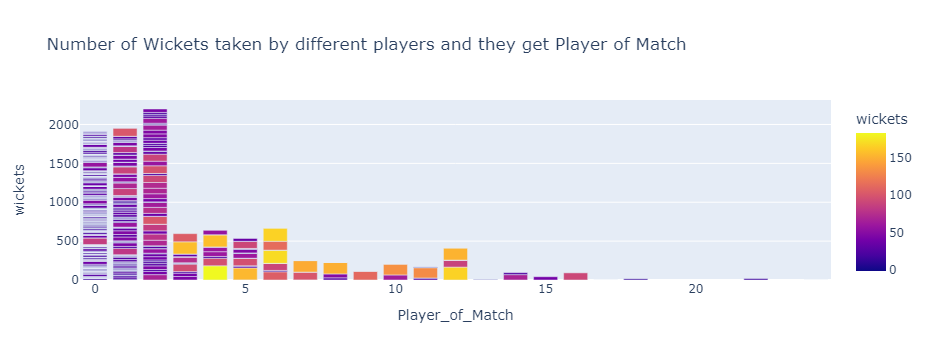

In [49]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

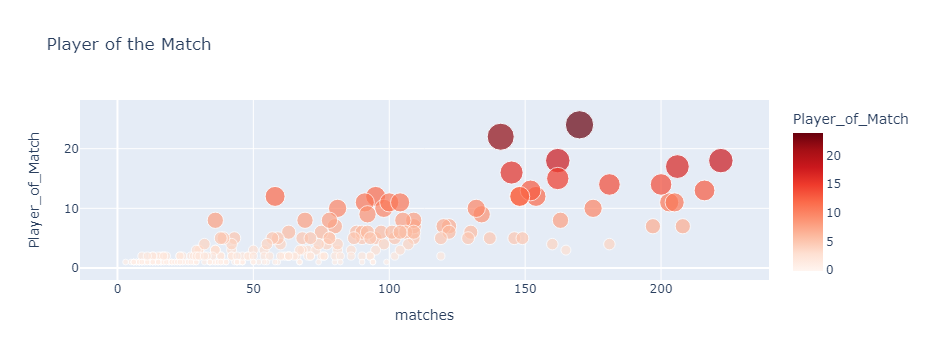

In [50]:
# Create the scatter plot to see the Most Player of the Match by a Player
fig = px.scatter(final_df, x='matches', y='Player_of_Match',color='Player_of_Match',
                 size='Player_of_Match', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

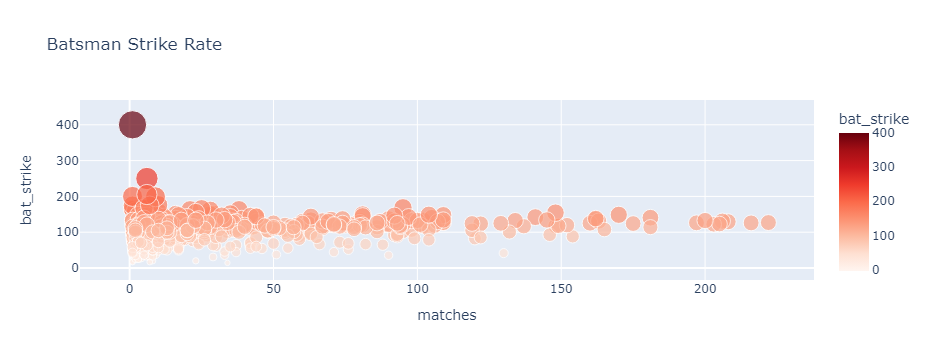

In [51]:
# Create the scatter plot to see Which player has best strike rate 
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

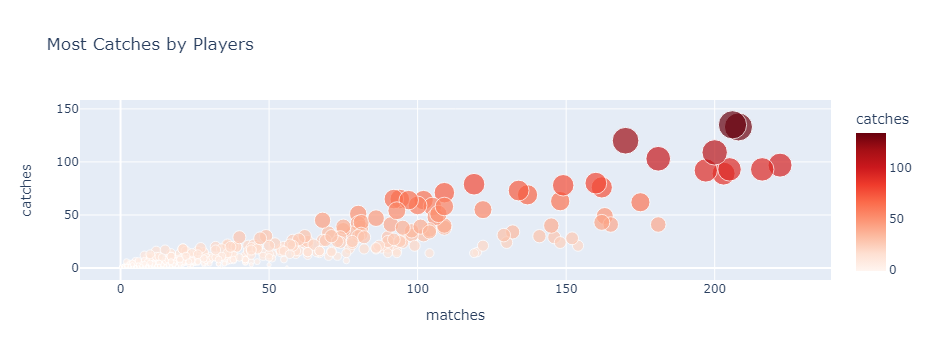

In [52]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

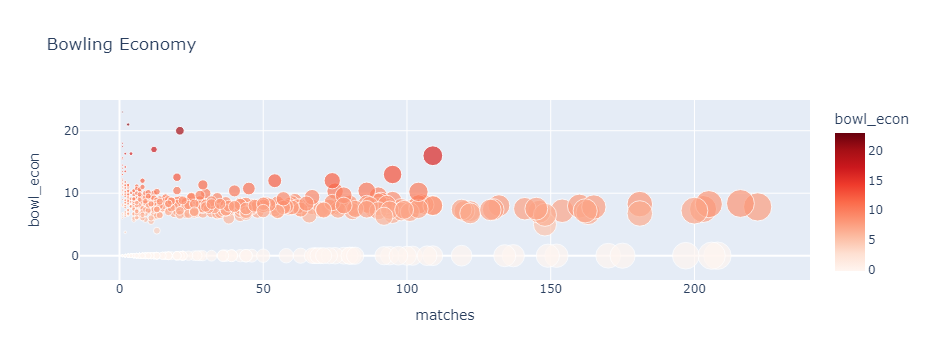

In [53]:
# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

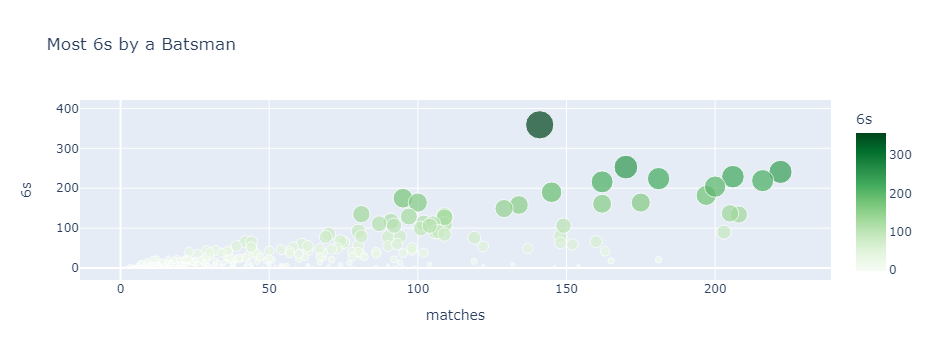

In [54]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

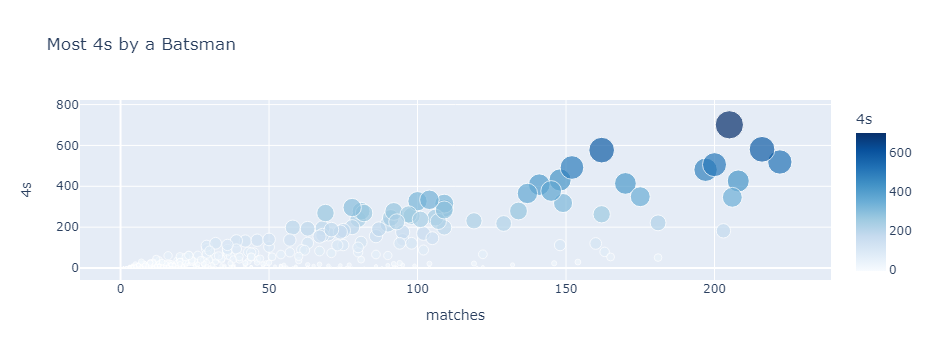

In [55]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

### As we look at the greatest players in the IPL thus far, let us look at the guys who have missed opportunities and scored most of the time 0's to balls they have faced or are out most of the time.

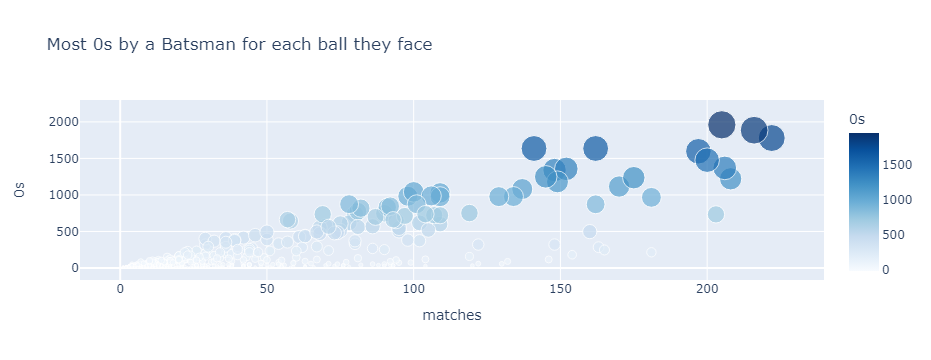

In [56]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

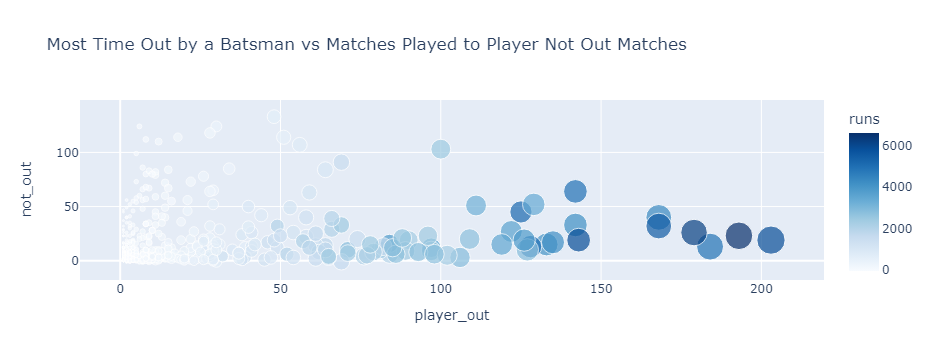

In [57]:
# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

## So, now that we've learned about players' greatest and worst performances, let's visualise who the top 10 batsmen, bowlers, strike rate, and best team are.

In [59]:
final_df = final_df[final_df['matches']>50]
final_df.head(16)

matches  Balls_Faced  innings    runs      0s      1s     2s  \
A Mishra          154.0        410.0      2.0   362.0   182.0   172.0   22.0   
A Nehra            88.0         63.0      2.0    41.0    37.0    21.0    1.0   
AB Dinda           76.0         50.0      2.0    26.0    31.0    16.0    1.0   
AB de Villiers    170.0       3487.0      4.0  5181.0  1115.0  1420.0  268.0   
AC Gilchrist       80.0       1555.0      2.0  2069.0   737.0   417.0   66.0   
AD Russell         95.0       1212.0      3.0  2039.0   509.0   343.0   47.0   
AJ Finch           90.0       1696.0      3.0  2092.0   749.0   546.0  105.0   
AM Nayar           51.0        588.0      2.0   672.0   234.0   230.0   47.0   
AM Rahane         148.0       3465.0      2.0  4074.0  1341.0  1371.0  227.0   
AR Patel          122.0        919.0      2.0  1135.0   321.0   411.0   66.0   
AT Rayudu         175.0       3375.0      2.0  4190.0  1236.0  1443.0  182.0   
B Kumar           146.0        259.0      2.0   241.0   117.0   101.0   15.0   
BB McCullum       109.0       2272.0      4.0  2882.0  1028.0   715.0  103.0   
BJ Hodge           63.0       1153.0      2.0  1400.0   439.0   452.0   89.0   
CH Gayle          141.0       3516.0      5.0  4997.0  1636.0  1018.0   92.0   
CH Morris          81.0        413.0      2.0   618.0   134.0   163.0   39.0   

                  3s     4s     6s  player_out  bat_average  bat_strike  \
A Mishra         0.0   29.0    5.0        30.0        12.07       88.29   
A Nehra          0.0    3.0    1.0         8.0         5.12       65.08   
AB Dinda         0.0    2.0    0.0         9.0         2.89       52.00   
AB de Villiers  17.0  414.0  253.0       125.0        41.45      148.58   
AC Gilchrist     4.0  239.0   92.0        76.0        27.22      133.05   
AD Russell       0.0  138.0  175.0        66.0        30.89      168.23   
AJ Finch         4.0  214.0   78.0        84.0        24.90      123.35   
AM Nayar         1.0   55.0   20.0        39.0        17.23      114.29   
AM Rahane       15.0  431.0   80.0       133.0        30.63      117.58   
AR Patel         0.0   67.0   54.0        59.0        19.24      123.50   
AT Rayudu        1.0  349.0  164.0       142.0        29.51      124.15   
B Kumar          0.0   23.0    3.0        28.0         8.61       93.05   
BB McCullum      3.0  293.0  130.0       106.0        27.19      126.85   
BJ Hodge         8.0  122.0   43.0        46.0        30.43      121.42   
CH Gayle         3.0  408.0  359.0       128.0        39.04      142.12   
CH Morris        1.0   41.0   35.0        29.0        21.31      149.64   

                BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
A Mishra            3317.0    166.0  553.0         3976.0       7.19   
A Nehra             1974.0    106.0  329.0         2495.0       7.58   
AB Dinda            1589.0     69.0  265.0         2073.0       7.82   
AB de Villiers         0.0      0.0    0.0            0.0       0.00   
AC Gilchrist           1.0      1.0    0.0            0.0       0.00   
AD Russell          1484.0     89.0  247.0         2179.0       8.82   
AJ Finch              44.0      1.0    7.0           67.0       9.57   
AM Nayar             239.0      9.0   40.0          322.0       8.05   
AM Rahane              6.0      1.0    1.0            5.0       5.00   
AR Patel            2599.0    101.0  433.0         3089.0       7.13   
AT Rayudu              0.0      0.0    0.0            0.0       0.00   
B Kumar             3384.0    154.0  564.0         3971.0       7.04   
BB McCullum            0.0      0.0    0.0            0.0       0.00   
BJ Hodge             238.0     17.0   40.0          303.0       7.58   
CH Gayle             584.0     18.0   97.0          729.0       7.52   
CH Morris           1801.0     96.0  300.0         2309.0       7.70   

                bowl_strike_rate  catches  Player_of_Match  not_out  
A Mishra                   19.98     21.0             12.0    124.0  
A Nehra       

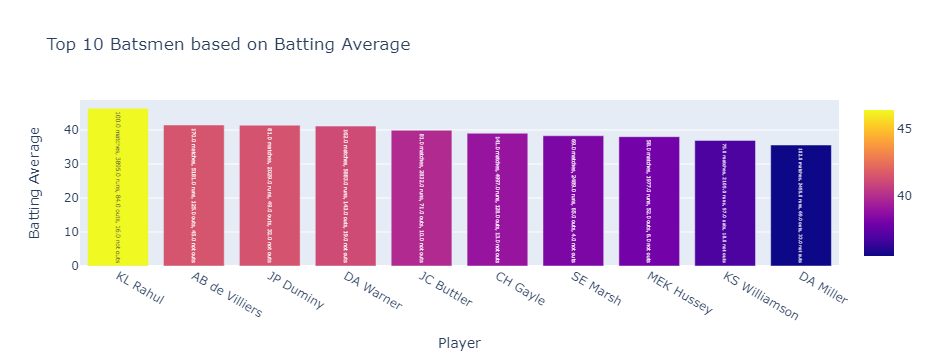

In [60]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

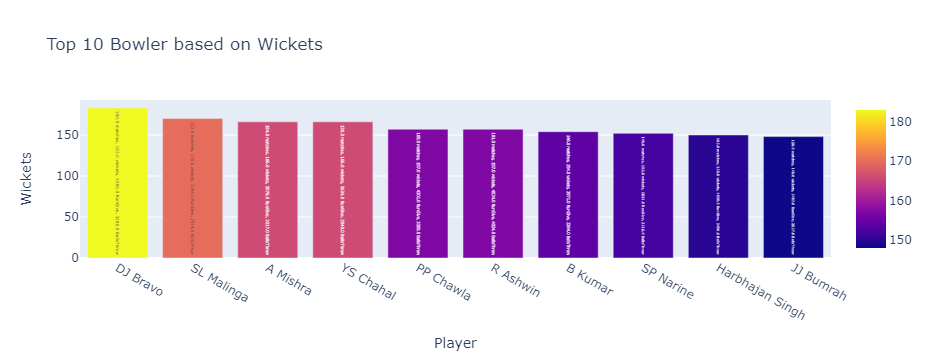

In [61]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [63]:
matches123.head(16)

Date  MatchNumber                        Team1  \
0  2022-05-29        Final             Rajasthan Royals   
1  2022-05-27  Qualifier 2  Royal Challengers Bangalore   
2  2022-05-25   Eliminator  Royal Challengers Bangalore   
3  2022-05-24  Qualifier 1             Rajasthan Royals   
4  2022-05-22           70          Sunrisers Hyderabad   
5  2022-05-21           69               Delhi Capitals   
6  2022-05-20           68          Chennai Super Kings   
7  2022-05-19           67               Gujarat Titans   
8  2022-05-18           66         Lucknow Super Giants   
9  2022-05-17           65          Sunrisers Hyderabad   
10 2022-05-16           64               Delhi Capitals   
11 2022-05-15           63             Rajasthan Royals   
12 2022-05-15           62          Chennai Super Kings   
13 2022-05-14           61        Kolkata Knight Riders   
14 2022-05-13           60                 Punjab Kings   
15 2022-05-12           59          Chennai Super Kings   

                          Team2  \
0                Gujarat Titans   
1              Rajasthan Royals   
2          Lucknow Super Giants   
3                Gujarat Titans   
4                  Punjab Kings   
5                Mumbai Indians   
6              Rajasthan Royals   
7   Royal Challengers Bangalore   
8         Kolkata Knight Riders   
9                Mumbai Indians   
10                 Punjab Kings   
11         Lucknow Super Giants   
12               Gujarat Titans   
13          Sunrisers Hyderabad   
14  Royal Challengers Bangalore   
15               Mumbai Indians   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   
15                       Wankhede Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   
15               Mumbai Indians        field         N   

                    WinningTeam    WonBy  Margin Player_of_Match  \
0                Gujarat Titans  Wickets     7.0       HH Pandya   
1              Rajasthan Royals  Wickets     7.0      JC Buttler   
2   Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3                Gujarat Titans  Wickets     7.0       DA Miller   
4                  Punjab Kings  Wickets     5.0   Harpreet Brar   
5                Mumbai Indians  Wickets     5.0       JJ Bumrah   
6              Rajasthan Royals  Wickets    

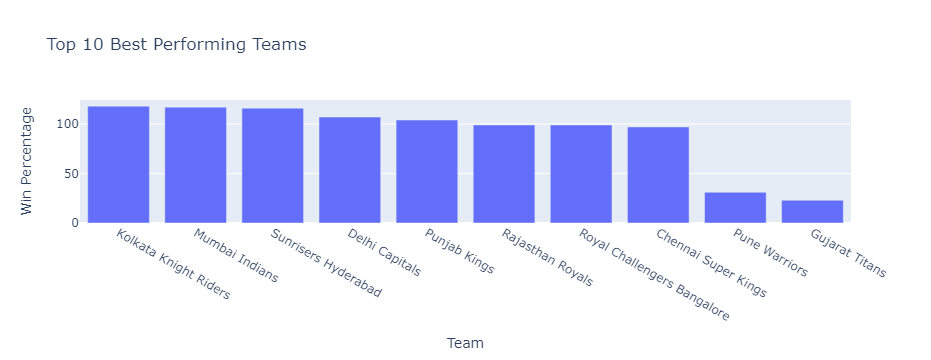

In [64]:
# Create a new column for the winning team
matches123["WinningTeam"] = matches123.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches123["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

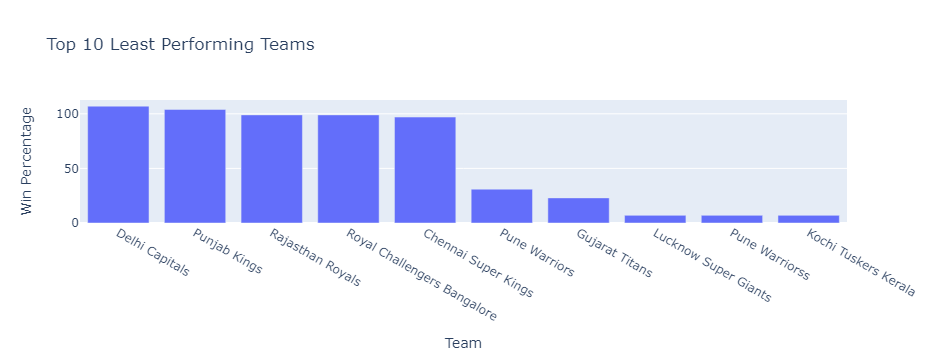

In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [66]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

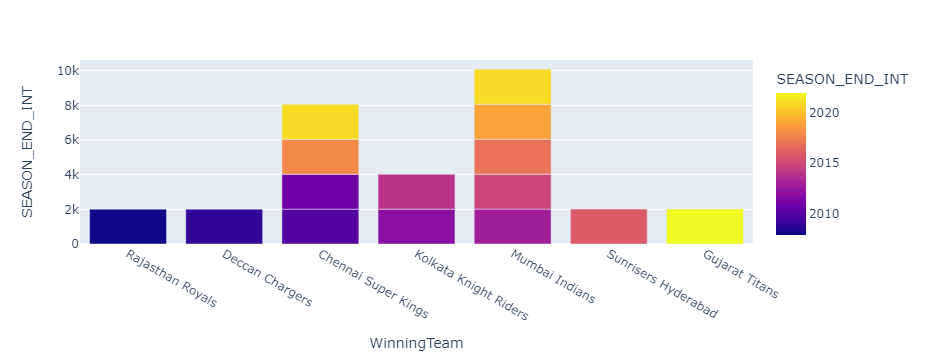

In [67]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

## Let's use K-Means Clustering to identify the Best Players of All Time.

<AxesSubplot:>

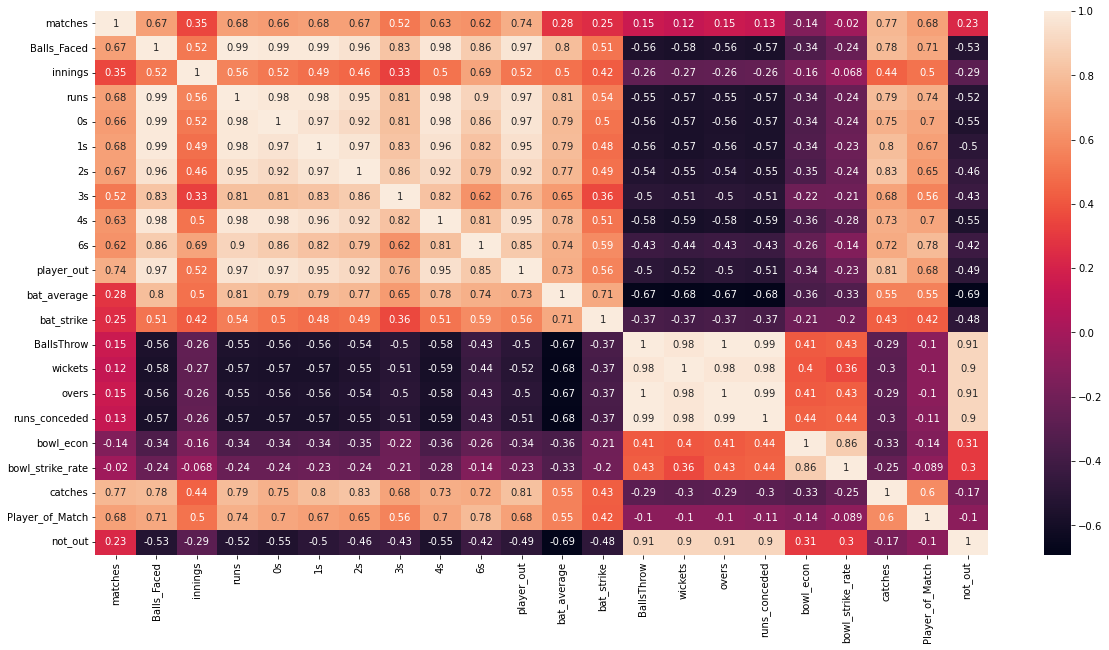

In [68]:
# Let's Remove the Most Correlated Columns
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [69]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [70]:
corr_cols = correlation(final_df,0.85)
corr_cols

['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [71]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [72]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head(16)

matches  Balls_Faced  innings  bat_average  bat_strike  \
A Mishra          154.0        410.0      2.0        12.07       88.29   
A Nehra            88.0         63.0      2.0         5.12       65.08   
AB Dinda           76.0         50.0      2.0         2.89       52.00   
AB de Villiers    170.0       3487.0      4.0        41.45      148.58   
AC Gilchrist       80.0       1555.0      2.0        27.22      133.05   
AD Russell         95.0       1212.0      3.0        30.89      168.23   
AJ Finch           90.0       1696.0      3.0        24.90      123.35   
AM Nayar           51.0        588.0      2.0        17.23      114.29   
AM Rahane         148.0       3465.0      2.0        30.63      117.58   
AR Patel          122.0        919.0      2.0        19.24      123.50   
AT Rayudu         175.0       3375.0      2.0        29.51      124.15   
B Kumar           146.0        259.0      2.0         8.61       93.05   
BB McCullum       109.0       2272.0      4.0        27.19      126.85   
BJ Hodge           63.0       1153.0      2.0        30.43      121.42   
CH Gayle          141.0       3516.0      5.0        39.04      142.12   
CH Morris          81.0        413.0      2.0        21.31      149.64   

                BallsThrow  bowl_econ  catches  Player_of_Match  
A Mishra            3317.0       7.19     21.0             12.0  
A Nehra             1974.0       7.58     19.0              6.0  
AB Dinda            1589.0       7.82      7.0              2.0  
AB de Villiers         0.0       0.00    120.0             24.0  
AC Gilchrist           1.0       0.00     51.0              7.0  
AD Russell          1484.0       8.82     27.0             12.0  
AJ Finch              44.0       9.57     29.0              5.0  
AM Nayar             239.0       8.05     13.0              0.0  
AM Rahane              6.0       5.00     63.0             12.0  
AR Patel            2599.0       7.13     55.0              7.0  
AT Rayudu              0.0       0.00     62.0             10.0  
B Kumar             3384.0       7.04     29.0              5.0  
BB McCullum            0.0       0.00     38.0              5.0  
BJ Hodge             238.0       7.58     22.0              6.0  
CH Gayle             584.0       7.52     30.0             22.0  
CH Morris           1801.0       7.70     38.0              3.0

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [74]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head(16)

matches  Balls_Faced   innings  bat_average  bat_strike  \
A Mishra        1.284238    -0.698228 -0.509563    -0.865744   -1.059655   
A Nehra        -0.292123    -0.986563 -0.509563    -1.530885   -2.001902   
AB Dinda       -0.578734    -0.997365 -0.509563    -1.744305   -2.532906   
AB de Villiers  1.666387     1.858559  2.571516     1.946034    1.387913   
AC Gilchrist   -0.483197     0.253192 -0.509563     0.584169    0.757448   
AD Russell     -0.124933    -0.031818  1.030976     0.935402    2.185636   
AJ Finch       -0.244354     0.370354  1.030976     0.362136    0.363661   
AM Nayar       -1.175841    -0.550322 -0.509563    -0.371912   -0.004144   
AM Rahane       1.140933     1.840278 -0.509563     0.910519    0.129419   
AR Patel        0.519942    -0.275282 -0.509563    -0.179548    0.369751   
AT Rayudu       1.785808     1.765494 -0.509563     0.803330    0.396138   
B Kumar         1.093164    -0.823699 -0.509563    -1.196879   -0.866416   
BB McCullum     0.209447     0.848973  2.571516     0.581297    0.505749   
BJ Hodge       -0.889229    -0.080844 -0.509563     0.891378    0.285310   
CH Gayle        0.973743     1.882656  4.112056     1.715387    1.125659   
CH Morris      -0.459313    -0.695735 -0.509563     0.018559    1.430946   

                BallsThrow  bowl_econ   catches  Player_of_Match  
A Mishra          2.127278   0.310825 -0.588725         1.429841  
A Nehra           0.859354   0.417325 -0.663943         0.128469  
AB Dinda          0.495876   0.482864 -1.115251        -0.739113  
AB de Villiers   -1.004295  -1.652602  3.134565         4.032587  
AC Gilchrist     -1.003351  -1.652602  0.539544         0.345364  
AD Russell        0.396746   0.755941 -0.363071         1.429841  
AJ Finch         -0.962755   0.960749 -0.287853        -0.088427  
AM Nayar         -0.778656   0.545672 -0.889597        -1.172904  
AM Rahane        -0.998630  -0.287214  0.990852         1.429841  
AR Patel          1.449415   0.294440  0.689980         0.345364  
AT Rayudu        -1.004295  -1.652602  0.953243         0.996051  
B Kumar           2.190532   0.269864 -0.287853        -0.088427  
BB McCullum      -1.004295  -1.652602  0.050627        -0.088427  
BJ Hodge         -0.779600   0.417325 -0.551116         0.128469  
CH Gayle         -0.452942   0.400941 -0.250244         3.598796  
CH Morris         0.696025   0.450095  0.050627        -0.522217

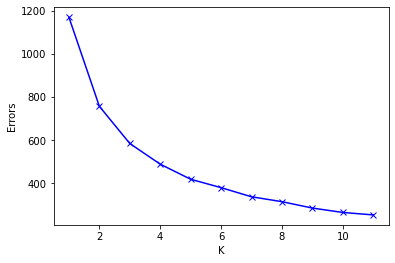

In [75]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')

In [76]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [77]:
final_df_new.head(16)

matches  Balls_Faced  innings  bat_average  bat_strike  \
A Mishra          154.0        410.0      2.0        12.07       88.29   
A Nehra            88.0         63.0      2.0         5.12       65.08   
AB Dinda           76.0         50.0      2.0         2.89       52.00   
AB de Villiers    170.0       3487.0      4.0        41.45      148.58   
AC Gilchrist       80.0       1555.0      2.0        27.22      133.05   
AD Russell         95.0       1212.0      3.0        30.89      168.23   
AJ Finch           90.0       1696.0      3.0        24.90      123.35   
AM Nayar           51.0        588.0      2.0        17.23      114.29   
AM Rahane         148.0       3465.0      2.0        30.63      117.58   
AR Patel          122.0        919.0      2.0        19.24      123.50   
AT Rayudu         175.0       3375.0      2.0        29.51      124.15   
B Kumar           146.0        259.0      2.0         8.61       93.05   
BB McCullum       109.0       2272.0      4.0        27.19      126.85   
BJ Hodge           63.0       1153.0      2.0        30.43      121.42   
CH Gayle          141.0       3516.0      5.0        39.04      142.12   
CH Morris          81.0        413.0      2.0        21.31      149.64   

                BallsThrow  bowl_econ  catches  Player_of_Match  cluster  
A Mishra            3317.0       7.19     21.0             12.0        1  
A Nehra             1974.0       7.58     19.0              6.0        1  
AB Dinda            1589.0       7.82      7.0              2.0        1  
AB de Villiers         0.0       0.00    120.0             24.0        2  
AC Gilchrist           1.0       0.00     51.0              7.0        3  
AD Russell          1484.0       8.82     27.0             12.0        0  
AJ Finch              44.0       9.57     29.0              5.0        0  
AM Nayar             239.0       8.05     13.0              0.0        0  
AM Rahane              6.0       5.00     63.0             12.0        2  
AR Patel            2599.0       7.13     55.0              7.0        1  
AT Rayudu              0.0       0.00     62.0             10.0        3  
B Kumar             3384.0       7.04     29.0              5.0        1  
BB McCullum            0.0       0.00     38.0              5.0        3  
BJ Hodge             238.0       7.58     22.0              6.0        0  
CH Gayle             584.0       7.52     30.0             22.0        2  
CH Morris           1801.0       7.70     38.0              3.0        0

In [78]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [79]:
topPlayers_cluster

PlayerNames  cluster
0           A Mishra        1
1            A Nehra        1
2           AB Dinda        1
3     AB de Villiers        2
4       AC Gilchrist        3
..               ...      ...
125  Y Venugopal Rao        0
126        YK Pathan        2
127        YS Chahal        1
128     Yuvraj Singh        0
129           Z Khan        1

[130 rows x 2 columns]

In [80]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [81]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [82]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [83]:
TopPlayer_Dataset

teams1             teams2          teams3            teams4
0        AD Russell           A Mishra  AB de Villiers      AC Gilchrist
1          AJ Finch            A Nehra       AM Rahane         AT Rayudu
2          AM Nayar           AB Dinda        CH Gayle       BB McCullum
3          BJ Hodge           AR Patel       HH Pandya         DA Miller
4         CH Morris            B Kumar      KA Pollard  DPMD Jayawardene
5          DJ Hooda           DJ Bravo      KD Karthik        EJG Morgan
6         DJ Hussey          DL Chahar        MS Dhoni         G Gambhir
7          DR Smith        DS Kulkarni       RA Jadeja      Ishan Kishan
8      F du Plessis           DW Steyn       RG Sharma        JC Buttler
9        GJ Maxwell           HV Patel      RV Uthappa     KC Sangakkara
10        IK Pathan    Harbhajan Singh        S Dhawan           KK Nair
11        JA Morkel           I Sharma        SK Raina          KL Rahul
12        JH Kallis        Imran Tahir       SR Watson         KM Jadhav
13        JP Duminy         JD Unadkat         V Kohli        MA Agarwal
14      JP Faulkner          JJ Bumrah       YK Pathan        MEK Hussey
15        KH Pandya           K Rabada                         MK Pandey
16    KS Williamson          KV Sharma                           NV Ojha
17      LRPL Taylor      Kuldeep Yadav                          PA Patel
18          M Vijay           L Balaji                           PP Shaw
19     MC Henriques           M Kartik                         Q de Kock
20        MK Tiwary           M Morkel                          R Dravid
21       MP Stoinis     M Muralitharan                           RR Pant
22    Mandeep Singh  M Prasidh Krishna                       S Badrinath
23           N Rana         MG Johnson                          SE Marsh
24        R Tewatia     MJ McClenaghan                         SS Tiwary
25      RA Tripathi           MM Patel                         SV Samson
26         SA Yadav          MM Sharma                      Shubman Gill
27       SC Ganguly     Mohammed Shami                           WP Saha
28     SR Tendulkar     Mohammed Siraj                                  
29          SS Iyer            P Kumar                                  
30        STR Binny          PP Chawla                                  
31  Shakib Al Hasan            PP Ojha                                  
32         V Sehwag           R Ashwin                                  
33  Y Venugopal Rao           R Bhatia                                  
34     Yuvraj Singh      R Vinay Kumar

Wow! Here are the 4 Clusters of Players that has Amazing Players Based on the Attributes and Players Performance from 2008 to 2022, Team 4 is really Amazing.

## Let's Create a Winning Prediction Model Right Now!

In [84]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')

In [85]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(16)

ID  innings  total_run
0   335982        1        222
2   335983        1        240
4   335984        1        129
6   335985        1        165
8   335986        1        110
10  335987        1        166
12  335988        1        142
14  335989        1        208
16  335990        1        214
18  335991        1        182
20  335992        1        135
22  335993        1        147
24  335994        1        154
26  335995        1        158
28  335996        1        178
30  335997        1        137

In [86]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(16)

ID  innings  total_run  target
0   335982        1        222     223
2   335983        1        240     241
4   335984        1        129     130
6   335985        1        165     166
8   335986        1        110     111
10  335987        1        166     167
12  335988        1        142     143
14  335989        1        208     209
16  335990        1        214     215
18  335991        1        182     183
20  335992        1        135     136
22  335993        1        147     148
24  335994        1        154     155
26  335995        1        158     159
28  335996        1        178     179
30  335997        1        137     138

In [87]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [88]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [89]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [90]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [91]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [92]:
matches.head(16)

ID         City        Date Season  MatchNumber  \
0   1312200    Ahmedabad  2022-05-29   2022        Final   
1   1312199    Ahmedabad  2022-05-27   2022  Qualifier 2   
2   1312198      Kolkata  2022-05-25   2022   Eliminator   
3   1312197      Kolkata  2022-05-24   2022  Qualifier 1   
4   1304116       Mumbai  2022-05-22   2022           70   
5   1304115       Mumbai  2022-05-21   2022           69   
6   1304114       Mumbai  2022-05-20   2022           68   
7   1304113       Mumbai  2022-05-19   2022           67   
8   1304112  Navi Mumbai  2022-05-18   2022           66   
9   1304111       Mumbai  2022-05-17   2022           65   
10  1304110  Navi Mumbai  2022-05-16   2022           64   
11  1304109       Mumbai  2022-05-15   2022           63   
12  1304108       Mumbai  2022-05-15   2022           62   
13  1304107         Pune  2022-05-14   2022           61   
14  1304106       Mumbai  2022-05-13   2022           60   
15  1304105       Mumbai  2022-05-12   2022           59   

                          Team1                        Team2  \
0              Rajasthan Royals               Gujarat Titans   
1   Royal Challengers Bangalore             Rajasthan Royals   
2   Royal Challengers Bangalore         Lucknow Super Giants   
3              Rajasthan Royals               Gujarat Titans   
4           Sunrisers Hyderabad                 Punjab Kings   
5                Delhi Capitals               Mumbai Indians   
6           Chennai Super Kings             Rajasthan Royals   
7                Gujarat Titans  Royal Challengers Bangalore   
8          Lucknow Super Giants        Kolkata Knight Riders   
9           Sunrisers Hyderabad               Mumbai Indians   
10               Delhi Capitals                 Punjab Kings   
11             Rajasthan Royals         Lucknow Super Giants   
12          Chennai Super Kings               Gujarat Titans   
13        Kolkata Knight Riders          Sunrisers Hyderabad   
14                 Punjab Kings  Royal Challengers Bangalore   
15          Chennai Super Kings               Mumbai Indians   

                                            Venue  \
0                Narendra Modi Stadium, Ahmedabad   
1                Narendra Modi Stadium, Ahmedabad   
2                           Eden Gardens, Kolkata   
3                           Eden Gardens, Kolkata   
4                        Wankhede Stadium, Mumbai   
5                        Wankhede Stadium, Mumbai   
6                       Brabourne Stadium, Mumbai   
7                        Wankhede Stadium, Mumbai   
8              Dr DY Patil Sports Academy, Mumbai   
9                        Wankhede Stadium, Mumbai   
10             Dr DY Patil Sports Academy, Mumbai   
11                      Brabourne Stadium, Mumbai   
12                       Wankhede Stadium, Mumbai   
13  Maharashtra Cricket Association Stadium, Pune   
14                      Brabourne Stadium, Mumbai   
15                       Wankhede Stadium, Mumbai   

                     TossWinner TossDecision SuperOver  \
0              Rajasthan Royals          bat         N   
1              Rajasthan Royals        field         N   
2          Lucknow Super Giants        field         N   
3                Gujarat Titans        field         N   
4           Sunrisers Hyderabad          bat         N   
5                Mumbai Indians        field         N   
6           Chennai Super Kings          bat         N   
7                Gujarat Titans          bat         N   
8          Lucknow Super Giants          bat         N   
9                Mumbai Indians        field         N   
10                 Punjab Kings        field         N   
11             Rajasthan Royals          bat         N   
12          Chennai Super Kings          bat         N   
13        Kolkata Knight Riders          bat         N   
14  Royal Challengers Bangalore        field         N   
15               Mumbai Indians        field         N   

          

In [93]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64

In [94]:
matches = matches[['ID','City','Team1','Team2','WinningTeam','target']].dropna()
matches.head(16)

ID         City                        Team1  \
0   1312200    Ahmedabad             Rajasthan Royals   
1   1312199    Ahmedabad  Royal Challengers Bangalore   
2   1312198      Kolkata  Royal Challengers Bangalore   
3   1312197      Kolkata             Rajasthan Royals   
4   1304116       Mumbai          Sunrisers Hyderabad   
5   1304115       Mumbai               Delhi Capitals   
6   1304114       Mumbai          Chennai Super Kings   
7   1304113       Mumbai               Gujarat Titans   
8   1304112  Navi Mumbai         Lucknow Super Giants   
9   1304111       Mumbai          Sunrisers Hyderabad   
10  1304110  Navi Mumbai               Delhi Capitals   
11  1304109       Mumbai             Rajasthan Royals   
12  1304108       Mumbai          Chennai Super Kings   
13  1304107         Pune        Kolkata Knight Riders   
14  1304106       Mumbai                 Punjab Kings   
15  1304105       Mumbai          Chennai Super Kings   

                          Team2                  WinningTeam  target  
0                Gujarat Titans               Gujarat Titans     131  
1              Rajasthan Royals             Rajasthan Royals     158  
2          Lucknow Super Giants  Royal Challengers Bangalore     208  
3                Gujarat Titans               Gujarat Titans     189  
4                  Punjab Kings                 Punjab Kings     158  
5                Mumbai Indians               Mumbai Indians     160  
6              Rajasthan Royals             Rajasthan Royals     151  
7   Royal Challengers Bangalore  Royal Challengers Bangalore     169  
8         Kolkata Knight Riders         Lucknow Super Giants     211  
9                Mumbai Indians          Sunrisers Hyderabad     194  
10                 Punjab Kings               Delhi Capitals     160  
11         Lucknow Super Giants             Rajasthan Royals     179  
12               Gujarat Titans               Gujarat Titans     134  
13          Sunrisers Hyderabad        Kolkata Knight Riders     178  
14  Royal Challengers Bangalore                 Punjab Kings     210  
15               Mumbai Indians               Mumbai Indians      98

In [95]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [96]:
balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head(16)

ID  innings  overs  ballnumber       batter          bowler  \
0   1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1   1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2   1312200        1      0           3   JC Buttler  Mohammed Shami   
3   1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4   1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
5   1312200        1      0           6  YBK Jaiswal  Mohammed Shami   
6   1312200        1      1           1   JC Buttler      Yash Dayal   
7   1312200        1      1           2   JC Buttler      Yash Dayal   
8   1312200        1      1           3   JC Buttler      Yash Dayal   
9   1312200        1      1           4   JC Buttler      Yash Dayal   
10  1312200        1      1           5   JC Buttler      Yash Dayal   
11  1312200        1      1           6  YBK Jaiswal      Yash Dayal   
12  1312200        1      2           1   JC Buttler  Mohammed Shami   
13  1312200        1      2           2  YBK Jaiswal  Mohammed Shami   
14  1312200        1      2           3  YBK Jaiswal  Mohammed Shami   
15  1312200        1      2           4  YBK Jaiswal  Mohammed Shami   

    non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0    JC Buttler        NaN            0           0          0             0   
1    JC Buttler    legbyes            0           1          1             0   
2   YBK Jaiswal        NaN            1           0          1             0   
3    JC Buttler        NaN            0           0          0             0   
4    JC Buttler        NaN            0           0          0             0   
5    JC Buttler        NaN            0           0          0             0   
6   YBK Jaiswal        NaN            0           0          0             0   
7   YBK Jaiswal        NaN            0           0          0             0   
8   YBK Jaiswal        NaN            4           0          4             0   
9   YBK Jaiswal        NaN            0           0          0             0   
10  YBK Jaiswal        NaN            1           0          1             0   
11   JC Buttler        NaN            0           0          0             0   
12  YBK Jaiswal        NaN            1           0          1             0   
13   JC Buttler        NaN            0           0          0             0   
14   JC Buttler        NaN            4           0          4             0   
15   JC Buttler        NaN            0           0          0             0   

    isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                  0        NaN  NaN               NaN  Rajasthan Royals  
1                  0        NaN  NaN               NaN  Rajasthan Royals  
2                  0        NaN  NaN               NaN  Rajasthan Royals  
3                  0        NaN  NaN               NaN  Rajasthan Royals  
4                  0        NaN  NaN               NaN  Rajasthan Royals  
5                  0        NaN  NaN               NaN  Rajasthan Royals  
6                  0        NaN  NaN               NaN  Rajasthan Royals  
7                  0        NaN  NaN               NaN  Rajasthan Royals  
8                  0        NaN  NaN               NaN  Rajasthan Royals  
9                  0        NaN  NaN               NaN  Rajasthan Royals  
10                 0        NaN  NaN               NaN  Rajasthan Royals  
11                 0        NaN  NaN               NaN  Rajasthan Royals  
12                 0        NaN  NaN               NaN  Rajasthan Royals  
13                 0        NaN  NaN               NaN  Rajasthan Royals  
14                 0        NaN  NaN               NaN  Rajasthan Royals  
15                 0        NaN  NaN               NaN  Rajasthan Royals

In [97]:
final = matches.merge(balls, on='ID')
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
0   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
1   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
2   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
3   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
4   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
5   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
6   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
7   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
8   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
9   1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
10  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
11  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
12  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
13  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
14  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
15  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

    target  innings  overs  ballnumber       batter          bowler  \
0      131        1      0           1  YBK Jaiswal  Mohammed Shami   
1      131        1      0           2  YBK Jaiswal  Mohammed Shami   
2      131        1      0           3   JC Buttler  Mohammed Shami   
3      131        1      0           4  YBK Jaiswal  Mohammed Shami   
4      131        1      0           5  YBK Jaiswal  Mohammed Shami   
5      131        1      0           6  YBK Jaiswal  Mohammed Shami   
6      131        1      1           1   JC Buttler      Yash Dayal   
7      131        1      1           2   JC Buttler      Yash Dayal   
8      131        1      1           3   JC Buttler      Yash Dayal   
9      131        1      1           4   JC Buttler      Yash Dayal   
10     131        1      1           5   JC Buttler      Yash Dayal   
11     131        1      1           6  YBK Jaiswal      Yash Dayal   
12     131        1      2           1   JC Buttler  Mohammed Shami   
13     131        1      2           2  YBK Jaiswal  Mohammed Shami   
14     131        1      2           3  YBK Jaiswal  Mohammed Shami   
15     131        1      2           4  YBK Jaiswal  Mohammed Shami   

    non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0    JC Buttler        NaN            0           0          0             0   
1    JC Buttler    legbyes            0           1          1             0   
2   YBK Jaiswal        NaN            1           0          1             0   
3    JC Buttler        NaN            0           0          0             0   
4    JC Buttler        NaN            0           0          0             0   
5    JC Buttler        NaN            0           0          0             0   
6   YBK Jaiswal        NaN            0           0          0             0   
7   YBK Jaiswal        NaN            0           0          0             0   
8   YBK Jaiswal        NaN            4           0          4             0   
9   YBK Jaiswal        NaN            0           0          0             0   
10  YBK Jaiswal        NaN            1           0          1             0   
11   JC Buttler        NaN            0           0          0             0   
12  YBK Jaiswal        NaN            1           0          1             0   
13   JC Buttler        NaN            0           0          0             0   
14   JC Buttler        NaN            4           0          4             0   
15   JC Buttler        NaN            0           0          0             0   

    isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                  0        NaN  NaN               NaN  Rajasthan Royals

In [98]:
final = final[final['innings']==2]
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [99]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [100]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [101]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [102]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [103]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [104]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [105]:
final['result'] = final.apply(result, axis=1)
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [106]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head(16)

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
125  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
126  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
127  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
128  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
129  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
130  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
131  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
132  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
133  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
134  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
135  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter             bowler  \
120     131        2      0           1       WP Saha           TA Boult   
121     131        2      0           2       WP Saha           TA Boult   
122     131        2      0           3       WP Saha           TA Boult   
123     131        2      0           4  Shubman Gill           TA Boult   
124     131        2      0           5  Shubman Gill           TA Boult   
125     131        2      0           6  Shubman Gill           TA Boult   
126     131        2      1           1       WP Saha  M Prasidh Krishna   
127     131        2      1           2       WP Saha  M Prasidh Krishna   
128     131        2      1           3       WP Saha  M Prasidh Krishna   
129     131        2      1           4       WP Saha  M Prasidh Krishna   
130     131        2      1           5       MS Wade  M Prasidh Krishna   
131     131        2      1           6       MS Wade  M Prasidh Krishna   
132     131        2      2           1  Shubman Gill           TA Boult   
133     131        2      2           2  Shubman Gill           TA Boult   
134     131        2      2           3  Shubman Gill           TA Boult   
135     131        2      2           4  Shubman Gill           TA Boult   

      non-striker extra_type  batsman_run  extras_run  total_run  \
120  Shubman Gill        NaN            0           0          0   
121  Shubman Gill        NaN            0           0          0   
122  Shubman Gill        NaN            1           0          1   
123       WP Saha        NaN            0           0          0   
124       WP Saha        NaN            0           0          0   
125       WP Saha        NaN            4           0          4   
126  Shubman Gill        NaN            0           0          0   
127  Shubman Gill        NaN            4           0          4   
128  Shubman Gill        NaN            0           0          0   
129  Shubman Gill        NaN            0           0          0   
130  Shubman Gill        NaN            2           0          2   
131  Shubman Gill        NaN            0           0          0   
132       MS Wade        NaN            0           0          0   
133       MS Wade        NaN            0           0          0   
134       MS Wade        NaN            0           0          0   
135       MS Wade        NaN            0           0          0   

     non_boundary  isWicketDelivery player_out    kind fielders_involved  \
120             0                 0        NaN     NaN               NaN   
121             0                 0        NaN     NaN               NaN   
122             0     

In [107]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

BattingTeam       BowlingTeam       City  runs_left  balls_left  \
120  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         119   
121  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         118   
122  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         117   
123  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         116   
124  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         115   

     wickets_left  current_run_rate  required_run_rate  target  result  
120            10               0.0           6.605042     131       1  
121            10               0.0           6.661017     131       1  
122            10               2.0           6.666667     131       1  
123            10               1.5           6.724138     131       1  
124            10               1.2           6.782609     131       1

In [108]:
winningPred.sample()

BattingTeam   BowlingTeam       City  runs_left  balls_left  \
84013  Sunrisers Hyderabad  Punjab Kings  Hyderabad         68          75   

       wickets_left  current_run_rate  required_run_rate  target  result  
84013            10         10.133333               5.44     144       1

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

In [110]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [113]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [114]:
pipe.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.01, 0.99],
       [0.83, 0.17],
       [0.07, 0.93]])

In [115]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

In [116]:
pipe.predict_proba(team2023)

array([[0.42, 0.58]])

In [117]:
l = [['Sunrisers Hyderabad', 'Mumbai Indians', 'Mumbai', 107, 48, 6 ,9, 6.4, 199]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)
pipe.predict_proba(team2023)

array([[0.57, 0.43]])

We aim to predict the winning team. From the above prediction we know that team 1 "Sunrisers Hyderabad" has a probability to win is 62% and team 2 "Mumbai Indians" has a probability to win is just 38%. We use LogisticRegression, RandomForestClassifier, Pipeline library to predict the score.